This tutorial present our latest update to treat hyperaman peak nearby the main SHG feature on the spectra. This is still exploratory and a work under progress, please do not hesitate to contact us if you have questions. 

In [1]:
%reset -f
import importlib
import numpy as np
import os 
import sys
import pickle

import matplotlib
import matplotlib.pyplot as plt

import Alpaga # the full package
from Alpaga import analyze_run 
from Alpaga.Data_tutorial import get_tutorial_path 

# Issue about Hyper Raman

Here, we see there is some signal right after the gaussian (412 to 423nm). This signal may cause an error in the placement of the Gaussian.

There is also a high background after 450nm that Alpaga can deal with.

I will look at file with the extention .dat in the directory /home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/Exclu_zonefor angle dependent values. The type of the files should be: prefix_angle_iter.extention
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/Exclu_zone/Spectre_0.0_1.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/Exclu_zone/Spectre_0.0_2.dat


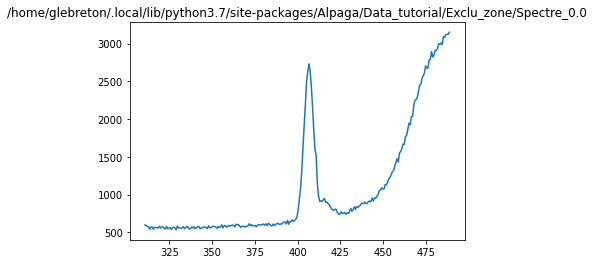

In [2]:
#path to data
directory = get_tutorial_path("Exclu_zone")
prefix_file, L_files_angles, N_iter, extention = Alpaga.file_management.find_angle_iter_from_dir(directory)
names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

# Cleaning parameters
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

# CLeaning and showing of datas
L_lambda, L_spectra, _ = Alpaga.analyze_run.averaging_and_cleaning(names, N_iter, extention='.dat', 
                                                                   fct_name=Alpaga.file_management.standard_file_name, 
                                                                   type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, 
                                                                   L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='average', 
                                                                   figure_counter=1)


# Gaussian fit with exclusion zone

To fix this issue, one can add an exclusion zone in alpaga for the gaussian fit.

Here we present how to do it.

(array([2050.84512807,  406.67978586,    4.11574797]),
 array([16.19336612,  0.02650803,  0.03812547]),
 4)

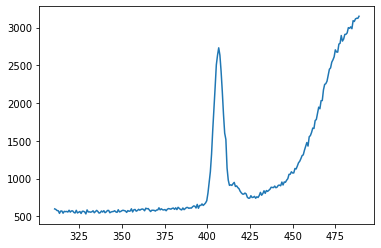

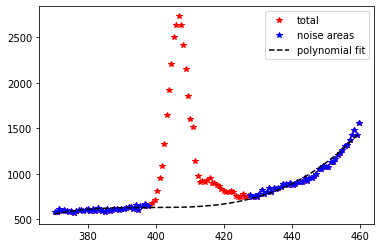

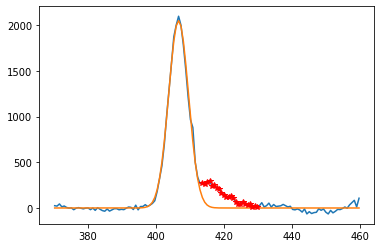

In [3]:
l_cut = [370, 398, 427, 460]
order_fit_noise = 3
bounds_fit_gausse=([0, 405, 2], [np.inf, 413, 5])
lambda_0_ref = 409
waist_ref = 5

############### Exclusion zone ###############
method_fit='fit_gauss_w_exclu'
exclu_zone = [413,430]

Alpaga.analyze_run.fit_gaussian_from_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, method_fit=method_fit, 
                                    bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, 
                                    exclu_zone=exclu_zone, fit_noise=False, show_spectra='all', figure_counter=1)

On the last graph, we can see the suppressed point in red to get the correct fit of the "main" peak.

We also show here that you can recover the curve coming from the polynomial fit of the noise 

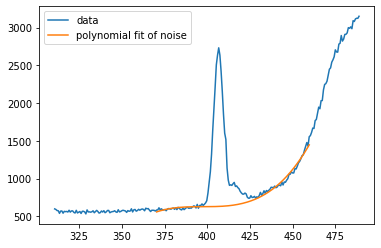

In [4]:
Result_without_noise_param=Alpaga.analyze_run.fit_gaussian_from_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, method_fit=method_fit, 
                                    bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, 
                                    exclu_zone=exclu_zone, fit_noise=False, show_spectra=False, figure_counter=1)

Result_with_noise_param=Alpaga.analyze_run.fit_gaussian_from_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, method_fit=method_fit, 
                                    bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, 
                                    exclu_zone=exclu_zone, fit_noise=True, show_spectra=False, figure_counter=1)

# @GLB: these print are difficult to read
#print(Result_without_noise_param)
#print(Result_with_noise_param)

plt.plot(L_lambda, L_spectra,label='data')
plt.plot(Result_with_noise_param[2],Result_with_noise_param[3],label='polynomial fit of noise')
plt.legend()

# Automatization for polarization analysis

In [5]:
# Path to data
directory = get_tutorial_path("Exclu_zone")

#cleaning parameter
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2.2, 1.8, 1.5, 1.5]
l_cut = [370, 399, 427, 458]
order_fit_noise = 3
automatic_l_cut = False
l_cut_n_n2 = [2, 9]
bounds_fit_gausse=([0, 405, 2], [np.inf, 413, 5])
lambda_0_ref = 409 # useless if you use method_fit_first='fit_gauss'
waist_ref = 5
fixed_para_gauss_fit = False
method_fit_second = 'both' # or integral_gauss' or 'fit_gauss' or 'both'


#name function parameters
prefix_file = False
L_files_angles = False 
N_iter = False
extention = '.dat'
fct_name = Alpaga.file_management.standard_file_name

# set to True to save your results
save_result=False
# change this to save your results
save_dir = os.path.join('whateverDir')
name_save_result = os.path.join(save_dir, 'treated_data.p')


waiting_time = False


######### EXCLUSION ZONE !!! #########
method_fit_first='fit_gauss_w_exclu'
exclu_zone = [413,430]


Angle: 180.0
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/Exclu_zone/Spectre_180.0_1.dat
/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/Exclu_zone/Spectre_180.0_2.dat


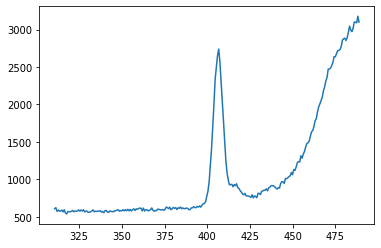

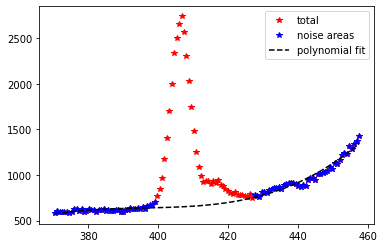

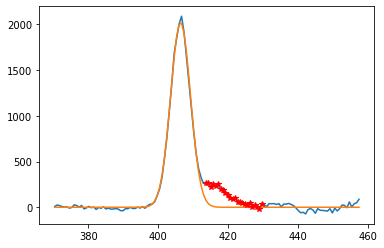

The results are not saved. Set save_result to True if you want to save them.


In [6]:
#The run takes less then a minute
L_post_prod_gauss_fit_integral = Alpaga.analyze_run.polarisation_intensity(directory=directory, prefix_file=prefix_file, L_files_angles=L_files_angles, N_iter=N_iter, extention=extention, fct_name=fct_name, type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, automatic_l_cut=automatic_l_cut, l_cut=l_cut, l_cut_n_n2=l_cut_n_n2, order_fit_noise=order_fit_noise, method_fit_first=method_fit_first, bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, exclu_zone = exclu_zone, fixed_para_gauss_fit=fixed_para_gauss_fit, method_fit_second=method_fit_second, save_result=save_result, name_save_result=name_save_result, waiting_time=waiting_time)


# Plot of the HyperRaman intensity

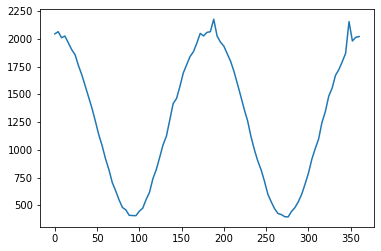

In [7]:
L_files_angles = L_post_prod_gauss_fit_integral['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2

L_intensity_angle = L_post_prod_gauss_fit_integral['L_intensity']
L_lambda_0_angle = L_post_prod_gauss_fit_integral['L_lambda_0']
L_waist_angle = L_post_prod_gauss_fit_integral['L_waist']

plt.plot(L_polarisation_angle, L_intensity_angle) #ploting